<a href="https://colab.research.google.com/github/derekopp/Oppenheim_github_tut/blob/main/Inside_Student_2024_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script will preform sentiment analysis on questions one, three, and nine (all qualitiative responses) of the 2024 Inside-Out Exit Survey distributed by the Theory Group. While our group currently lacks sufficient data to provide insights, this page can register as many observations/responses as can fit on a spreadsheet (countless), as to assist with future course evaluations when further data is collected.

**Question 1:** Many Students Report Inside Out to be a "transformative" experience. Looking back how would you say your perspective, or your choices, are different as a result of Inside Out?

In [1]:
import pandas as pd

#Reading in data provided by I-O and transcribed by our group
q1_2024_survey = pd.read_excel("q1_2024_survey.xlsx") #Import xl sheet with a name that can be distinguished from the other questions
q1_2024_survey = q1_2024_survey[["Response:"]] #Isolate the response column
print(q1_2024_survey)

                                           Response:
0                Yes. Addressing legal related issue
1                                                 No
2  Yes. Upon my interaction with students there's...
3  Yes. I try to associate for prison reform thro...
4  Yes. I have a friend who has taken inside out ...
5                                                NaN
6  Yes. Many brainstorming with other members. Th...
7  Yes. Very active with reform; written and spok...
8  Yes. Some lifers came together and created a b...


In [2]:
import re                                                                       # Import  regular expression library

import nltk                                                                     # Import Imports the Natural Language Toolkit library
nltk.download('stopwords')                                                      # Downloads a set of commonly used stopwords
from nltk.corpus import stopwords                                               # Imports the stopwords from the NLTK corpus
STOPWORDS = set(stopwords.words('english'))                                     # Creates a set of English stopwords from NLTK's corpus

# function for text cleaning:
def text_clean (redd):                                                        # Create a function called reddit_clean
    redd = str(redd).lower()                                                    # Converts the text to lowercase
    redd = re.sub("'", "", redd)                                                # Removes single quotes
    redd = re.sub("@[A-Za-z0-9_]+","", redd)                                    # Removes patterns that start with '@'
    redd = re.sub("#[A-Za-z0-9_]+","", redd)                                    # Removes patterns that start with '#'
    redd = re.sub(r"www.\S+", "", redd)                                         # Removes URLs that start with 'www.'
    redd = re.sub(r"http\S+", "", redd)                                         # Removes URLs.
    redd = re.sub('[()!?]', ' ', redd)                                          # Replaces parentheses, exclamation marks, and question marks with spaces
    redd = re.sub('\[.*?\]',' ', redd)                                          # Removes text within square brackets
    redd = re.sub("[^a-z0-9]"," ", redd)                                        # Replaces non-alphanumeric characters with spaces.
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)
    redd = re.sub("x000d", "", redd)
    redd = re.sub(r"would"," ", redd)                                           #Remove irrelevant words for the visualizaton
    redd = re.sub(r"want"," ", redd)
    redd = re.sub(r"class"," ", redd)
    redd = re.sub(r"gain"," ", redd)                                    #Remove newline code                               #Removing words we do not want to analyze
    redd = redd.split()                                                         # Splits the text into a list of words
    stopwords = STOPWORDS                                                       # Assigns the set of stopwords to a variable called stopwords
    redd = [w for w in redd if not w in stopwords]                              # Removes stopwords from the list of words
    redd = " ".join(word for word in redd)                                      # Joins the remaining words back into a string
    return redd

q1_2024_survey['Response:'] = q1_2024_survey['Response:'].apply(text_clean)

print(q1_2024_survey)

                                           Response:
0                     addressing legal related issue
1                                                   
2  upon interaction students theres sense comfort...
3  associate prison reform sister actively partic...
4  friend taken inside well discussing justice sy...
5                                                   
6  many brainstorming members meetings brainstorm...
7                  active reform written spoken reps
8  lifers came together created booklet called se...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#splitting
q1_tokenized = q1_2024_survey['Response:'].apply(lambda x: x.split())

In [4]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
q1_tokenized = q1_tokenized.apply(lambda x: [stemmer.stem(i) for i in x])
q1_2024_survey['response_tokenized'] = q1_tokenized

In [5]:
print(q1_2024_survey)

                                           Response:  \
0                     addressing legal related issue   
1                                                      
2  upon interaction students theres sense comfort...   
3  associate prison reform sister actively partic...   
4  friend taken inside well discussing justice sy...   
5                                                      
6  many brainstorming members meetings brainstorm...   
7                  active reform written spoken reps   
8  lifers came together created booklet called se...   

                                  response_tokenized  
0                      [address, legal, relat, issu]  
1                                                 []  
2  [upon, interact, student, there, sens, comfort...  
3  [associ, prison, reform, sister, activ, partic...  
4  [friend, taken, insid, well, discuss, justic, ...  
5                                                 []  
6  [mani, brainstorm, member, meet, brainstorm, s...  

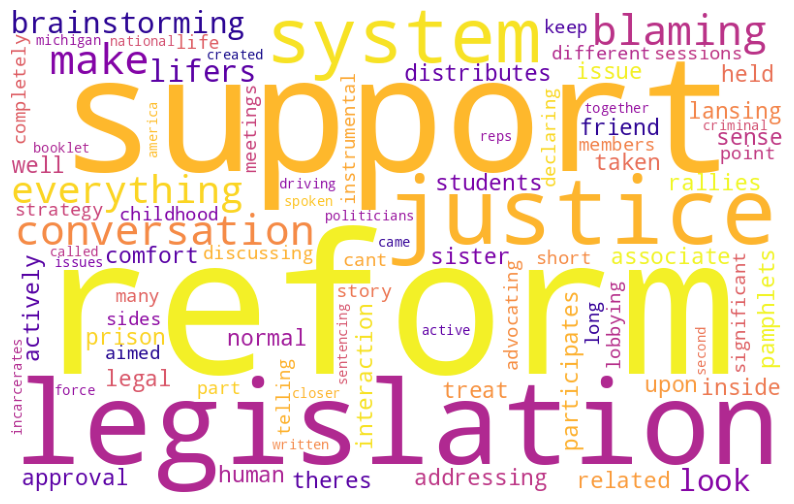

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

all_words = ' '.join([text for text in q1_2024_survey['Response:']])      # Concatenates all the text data into a single string
count_word = collections.Counter(all_words.split())                   # Tokenize the all_words and count their frequencies

wordcloud = WordCloud(background_color='white', colormap='plasma', width=800, height=500)                          # width and height of the wordcloud in pixel
wordcloud.generate_from_frequencies(count_word)
                      # generate the word cloud based on the word frequencies calculated earlier.
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud for Question 1")
plt.show()
#p.save("2024_wordcloud_q1.png")

# optionally, you can save this plot to a png by adding the function above (uncommenting the line)


In [8]:
import itertools
import collections
#count the most words shown up in all_words
count_word = collections.Counter(all_words.split())
count_word.most_common(15)

[('reform', 3),
 ('support', 2),
 ('legislation', 2),
 ('justice', 2),
 ('system', 2),
 ('conversation', 2),
 ('make', 2),
 ('blaming', 2),
 ('everything', 2),
 ('brainstorming', 2),
 ('lifers', 2),
 ('look', 2),
 ('addressing', 1),
 ('legal', 1),
 ('related', 1)]

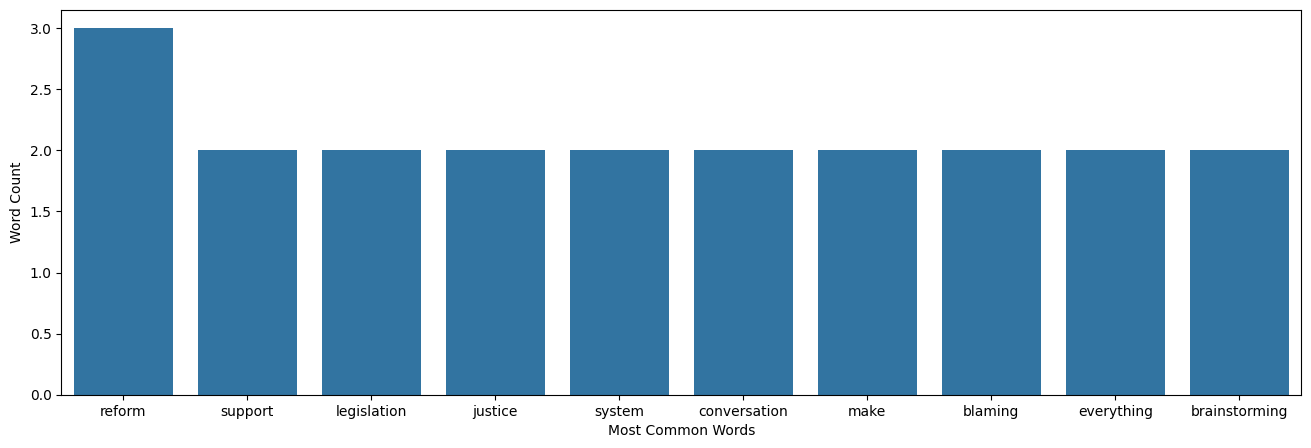

In [9]:
# Make a bar chart of the top 10 words by frequency
import seaborn as sns
a = nltk.FreqDist(count_word)                       # Create a frequency distribution a from the counted objects in word_count
d = pd.DataFrame({'Common_Words': list(a.keys()),
                  'Frequency': list(a.values())})
# selecting top 10 most frequent words
d = d.nlargest(columns="Frequency", n = 10)             # Select the top 10
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Common_Words", y = "Frequency")
ax.set(ylabel = 'Word Count')
ax.set(xlabel = 'Most Common Words - Question 1')                       # The code sets the label for both axes
plt.show()

**Question 3b:**  "Please provide an example of your activity"

In [11]:
q3_2024_survey = pd.read_excel("q3_2024_survey.xlsx") #Import xl sheet
q3_2024_survey = q3_2024_survey[["Response"]] # maintain distinct environmental variables to avoid overwriting data
print(q3_2024_survey)

                                            Response
0  The ability to communicate through writing bec...
1  I signed up to be a mentor in a group called s...
2  We had discussions on the religious discrimina...
3  I am more invovled in the leader dog program &...
4  I have a mentorship program that is faith base...
5                                                NaN
6  Actively involved in NLA (national Lifer's Ass...
7                   Criminal justice reform advocate
8  I ran for block representative and voted as ch...


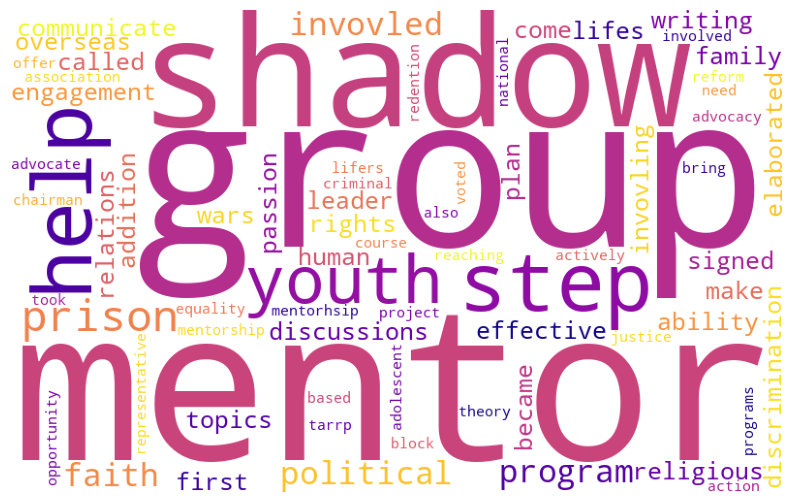

In [14]:
#Use cleaning function
q3_2024_survey['Response'] = q3_2024_survey['Response'].apply(text_clean)

#splitting
q3_tokenized = q3_2024_survey['Response'].apply(lambda x: x.split())

#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
q3_tokenized = q3_tokenized.apply(lambda x: [stemmer.stem(i) for i in x])
q3_2024_survey['response_tokenized'] = q3_tokenized


q3_all_words = ' '.join([text for text in q3_2024_survey['Response']])      # Concatenates all the text data into a single string
q3_count_word = collections.Counter(q3_all_words.split()) # specify question number here

wordcloud = WordCloud(background_color='white', colormap='plasma', width=800, height=500)                          # width and height of the wordcloud in pixel
wordcloud.generate_from_frequencies(q3_count_word) #specify question number

                      # generate the word cloud based on the word frequencies calculated earlier.
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
#count the most words shown up in all_words
q3_count_word = collections.Counter(q3_all_words.split())
q3_count_word.most_common(15)

[('mentor', 2),
 ('group', 2),
 ('shadow', 2),
 ('step', 2),
 ('help', 2),
 ('youth', 2),
 ('prison', 2),
 ('political', 2),
 ('invovled', 2),
 ('program', 2),
 ('faith', 2),
 ('ability', 1),
 ('communicate', 1),
 ('writing', 1),
 ('became', 1)]

**Question 9:** If you've done other kinds of education, how has Inside Out compared?

In [16]:
q9_2024_survey = pd.read_excel("q9_2024_survey.xlsx") #Import xl sheet
q9_2024_survey = q9_2024_survey[["Response"]]
print(q9_2024_survey)

                                            Response
0  Inside Out exceeds other prison learning oppor...
1         You get more out of the inside out program
2                                     New experience
3                             It is quite different.
4  Inside Out compares well because IO to me is a...
5  It had more of a college class experience / li...
6  io is one of a kind because it nurtures conver...
7                Does not compare academically to BA
8  In terms of listening skills and exposure to d...


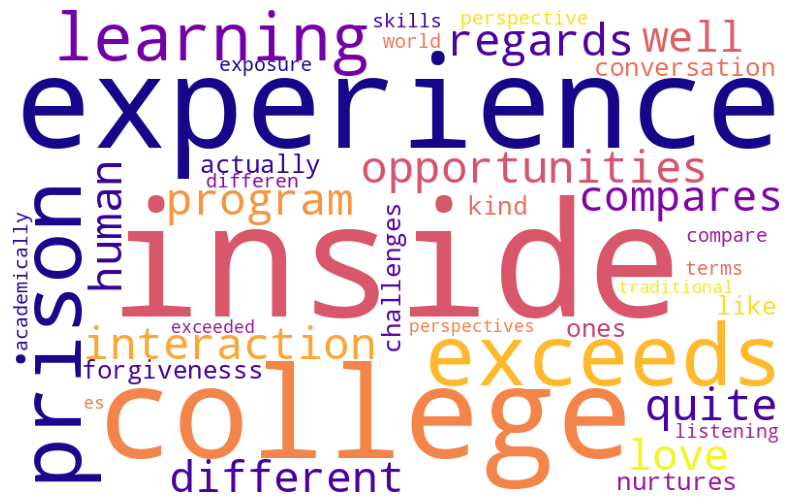

In [17]:
#Use cleaning function
q9_2024_survey['Response'] = q9_2024_survey['Response'].apply(text_clean)

#splitting
q9_tokenized = q9_2024_survey['Response'].apply(lambda x: x.split())

#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
q9_tokenized = q9_tokenized.apply(lambda x: [stemmer.stem(i) for i in x])
q9_2024_survey['response_tokenized'] = q9_tokenized


q9_all_words = ' '.join([text for text in q9_2024_survey['Response']])      # Concatenates all the text data into a single string
q9_count_word = collections.Counter(q9_all_words.split()) # specify question number here

wordcloud = WordCloud(background_color='white', colormap='plasma', width=800, height=500)                          # width and height of the wordcloud in pixel
wordcloud.generate_from_frequencies(q9_count_word) #specify question number

                      # generate the word cloud based on the word frequencies calculated earlier.
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
#count the most words shown up in all_words
q9_count_word = collections.Counter(q9_all_words.split())
q9_count_word.most_common(15)

[('inside', 3),
 ('experience', 3),
 ('college', 3),
 ('exceeds', 1),
 ('prison', 1),
 ('learning', 1),
 ('opportunities', 1),
 ('regards', 1),
 ('human', 1),
 ('interaction', 1),
 ('program', 1),
 ('quite', 1),
 ('different', 1),
 ('compares', 1),
 ('well', 1)]